# Przegląd metod redukcji wymiarów w danych wielowymiarowych wraz z prezentacją i wizualizacją ich działania

#### Cel projektu: celem projektu jest dokonanie przeglądu i implementacji wybranych metod redukcji wymiarów dla danych wielowymiarowych (np. PCA, t-SNE, UMAP). Aplikacja powinna umożliwiać wczytywanie danych, przeprowadzanie redukcji wymiarów oraz wizualizację wyników (np. w 2D lub 3D), a także porównanie efektywności poszczególnych metod.

##### Importowanie bibliotek

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll, fetch_openml, make_blobs, fetch_covtype
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
import openml
import time
from tqdm.notebook import tqdm

In [42]:
plt.style.use('dark_background')
scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')

### Zbiór syntetyczny Swiss Roll

##### Swiss Roll - wykres 3D

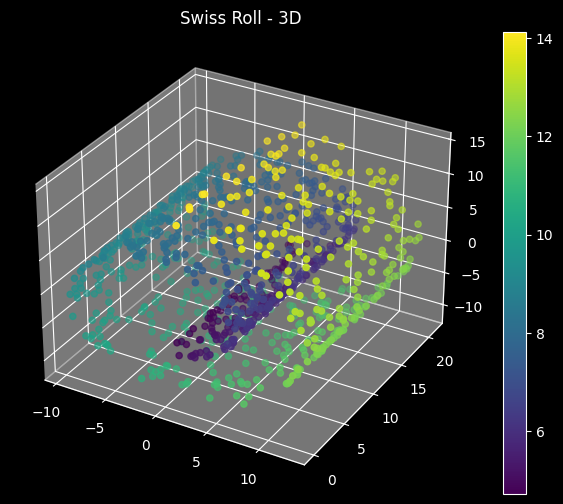

In [43]:
X_swiss, y_swiss = make_swiss_roll(n_samples=1000, noise=0.05)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_swiss[:,0], X_swiss[:,1], X_swiss[:,2], c=y_swiss, cmap=plt.cm.viridis)
fig.colorbar(p, ax=ax)
ax.set_title("Swiss Roll - 3D")
plt.show()

##### PCA - Swiss Roll

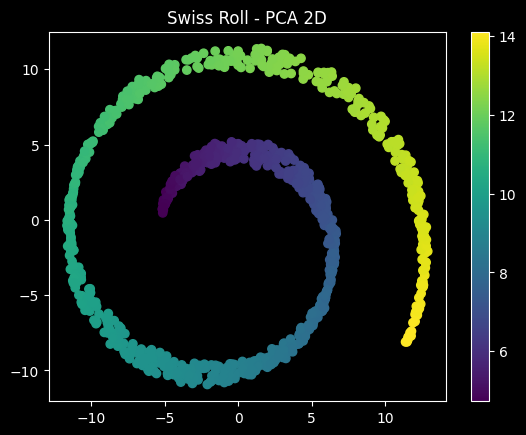

In [44]:
pca_swiss = PCA(n_components=2)
start_pca_swiss = time.perf_counter()
X_pca_swiss = pca_swiss.fit_transform(X_swiss)
end_pca_swiss = time.perf_counter()

plt.scatter(X_pca_swiss[:,0], X_pca_swiss[:,1], c=y_swiss, cmap=plt.cm.viridis)
plt.title("Swiss Roll - PCA 2D")
plt.colorbar()
plt.show()

##### t-SNE - Swiss Roll

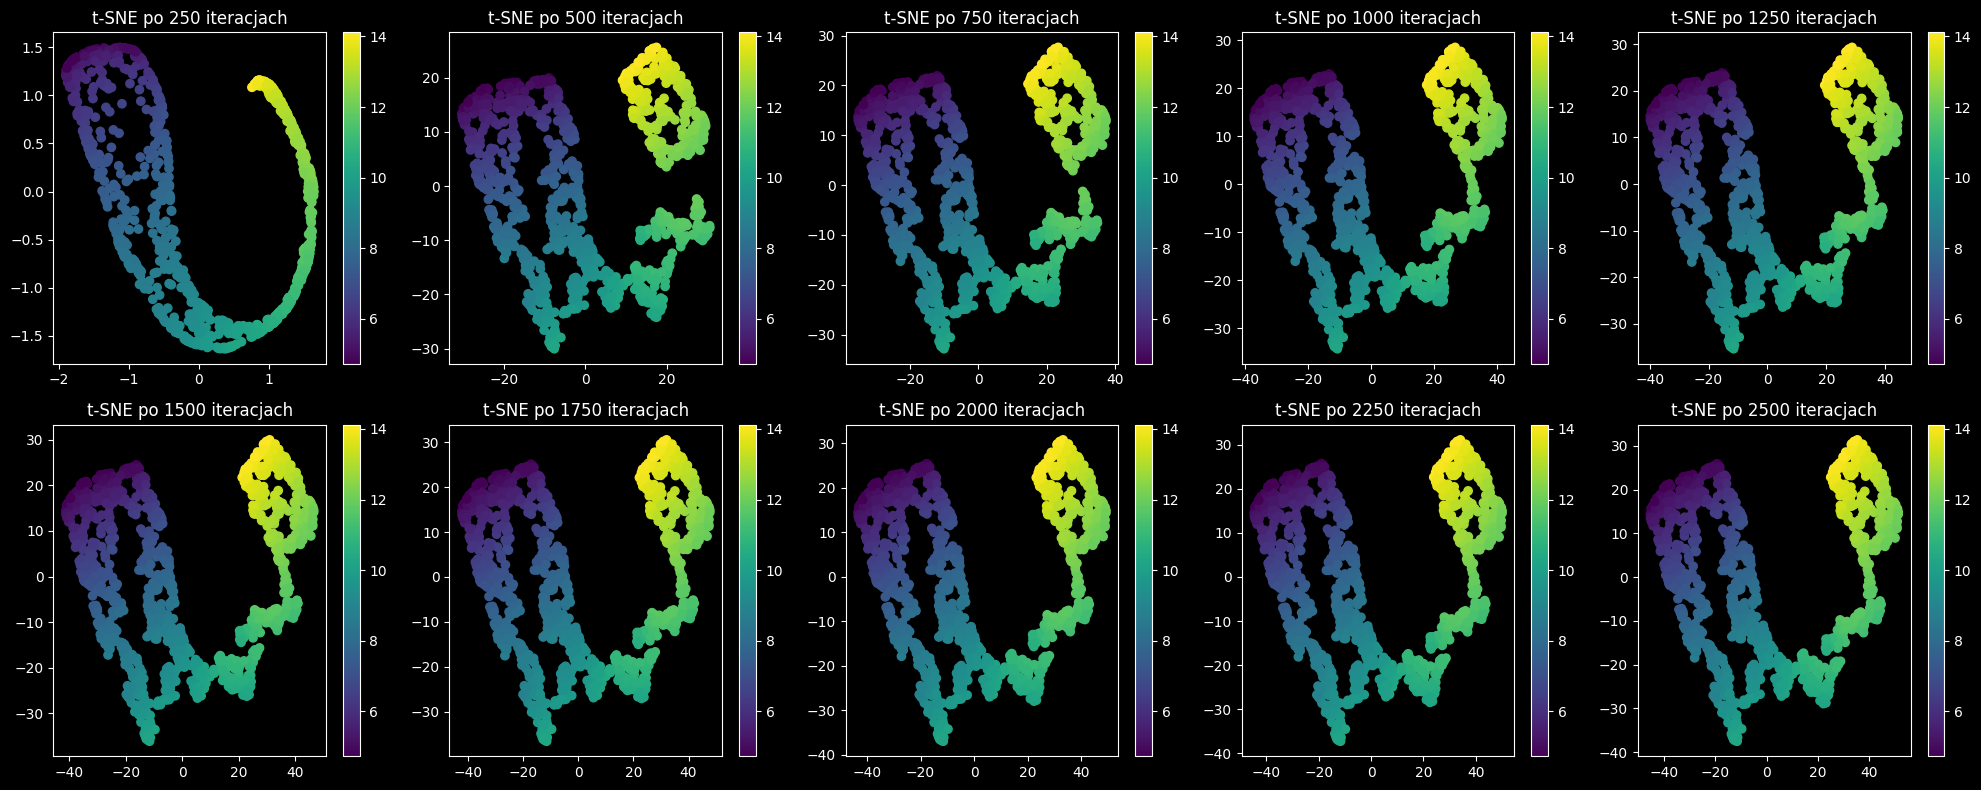

In [55]:
tsne_swiss = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42, n_iter=250)
start_tsne_swiss = time.perf_counter()
X_tsne_swiss_iter = tsne_swiss.fit_transform(X_swiss)
end_tsne_swiss = time.perf_counter()

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i in range(1, 11):
    tsne_temp = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42, n_iter=i * 250)
    X_tsne_swiss = tsne_temp.fit_transform(X_swiss)

    ax = axes[(i-1) // 5, (i-1) % 5]
    scatter = ax.scatter(X_tsne_swiss[:, 0], X_tsne_swiss[:, 1], c=y_swiss, cmap=plt.cm.viridis)
    ax.set_title(f"t-SNE po {i * 250} iteracjach")
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

##### UMAP - Swiss Roll

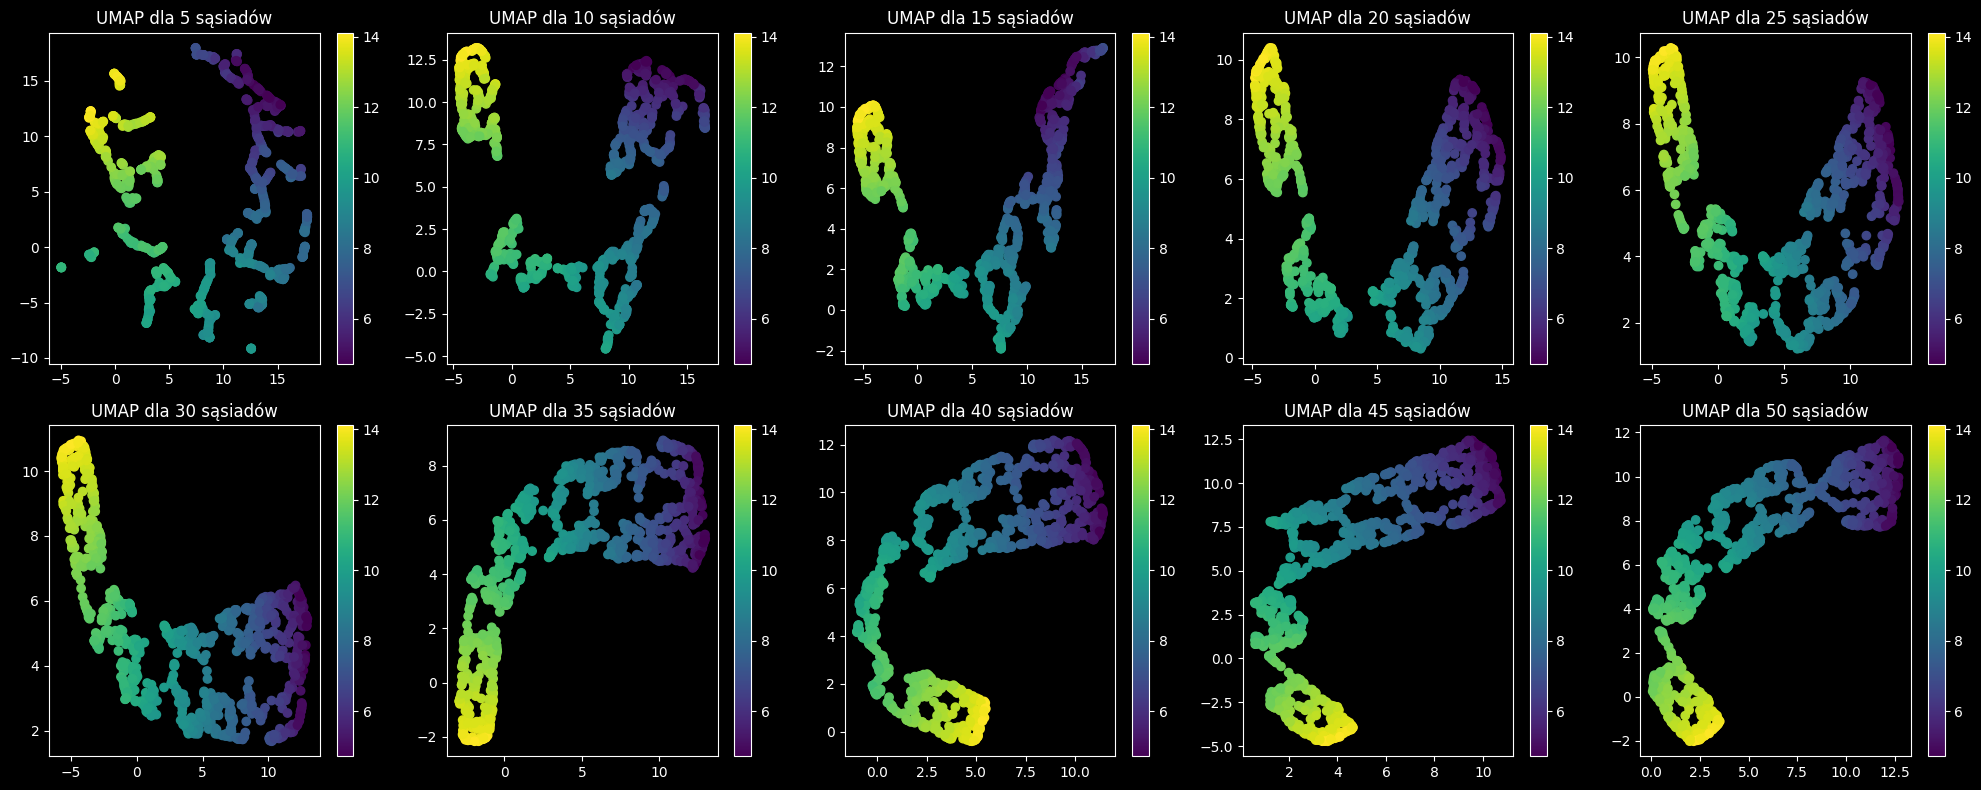

In [56]:
umap_swiss = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
start_umap_swiss = time.perf_counter()
X_umap_swiss = umap_swiss.fit_transform(X_swiss)
end_umap_swiss = time.perf_counter()

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i in range(1, 11):
    umap_temp = umap.UMAP(n_components=2, n_neighbors=i * 5, min_dist=0.1, random_state=42)
    X_umap_swiss = umap_temp.fit_transform(X_swiss)

    ax = axes[(i-1) // 5, (i-1) % 5]
    scatter = ax.scatter(X_umap_swiss[:, 0], X_umap_swiss[:, 1], c=y_swiss, cmap=plt.cm.viridis)
    ax.set_title(f"UMAP dla {i*5} sąsiadów")
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

##### Porównanie czasów redukcji wymiarów dla Swiss Roll

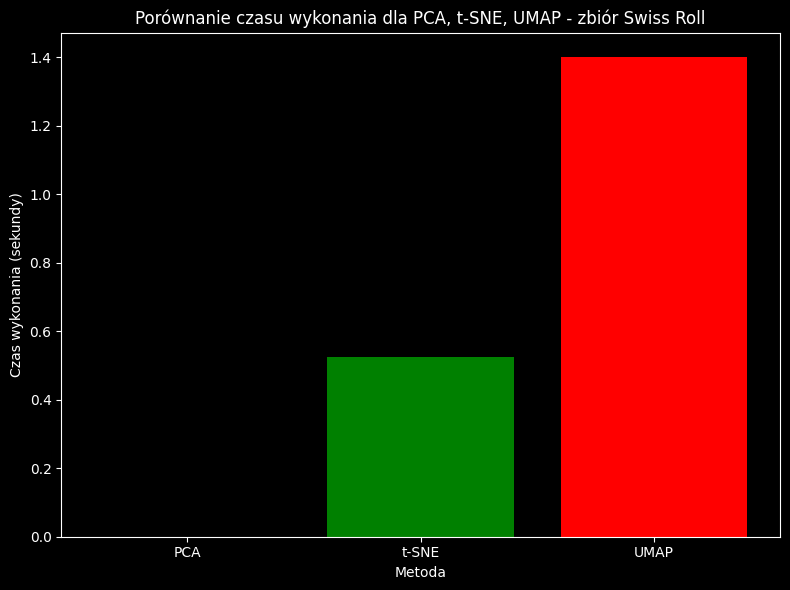

In [57]:
times_swiss = {
    'PCA': end_pca_swiss - start_pca_swiss,
    't-SNE': end_tsne_swiss - start_tsne_swiss,
    'UMAP': end_umap_swiss - start_umap_swiss
}

methods_swiss = list(times_swiss.keys())
execution_times_swiss = list(times_swiss.values())

plt.figure(figsize=(8, 6))
plt.bar(methods_swiss, execution_times_swiss, color=['blue', 'green', 'red'])
plt.xlabel('Metoda')
plt.ylabel('Czas wykonania (sekundy)')
plt.title('Porównanie czasu wykonania dla PCA, t-SNE, UMAP - zbiór Swiss Roll')
plt.tight_layout()
plt.show()

### Zbiór syntetyczny Blobs

##### Blobs - wykres 3D

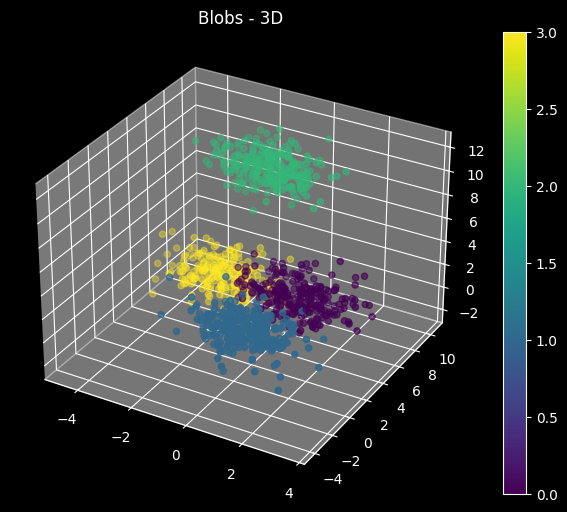

In [58]:
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=4, n_features=3, random_state=0)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X_blobs[:,0], X_blobs[:,1], X_blobs[:,2], c=y_blobs, cmap=plt.cm.viridis)
fig.colorbar(p, ax=ax)
ax.set_title("Blobs - 3D")
plt.show()

##### PCA - Blobs

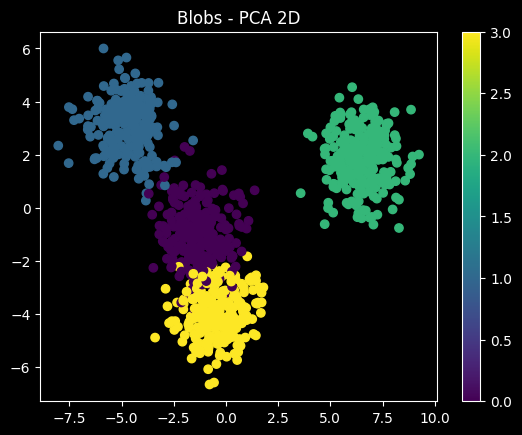

In [59]:
pca_blobs = PCA(n_components=2)
start_pca_blobs = time.perf_counter()
X_pca_blobs = pca_blobs.fit_transform(X_blobs)
end_pca_blobs = time.perf_counter()
plt.scatter(X_pca_blobs[:,0], X_pca_blobs[:,1], c=y_blobs, cmap=plt.cm.viridis)
plt.title("Blobs - PCA 2D")
plt.colorbar()
plt.show()

t-SNE - Blobs

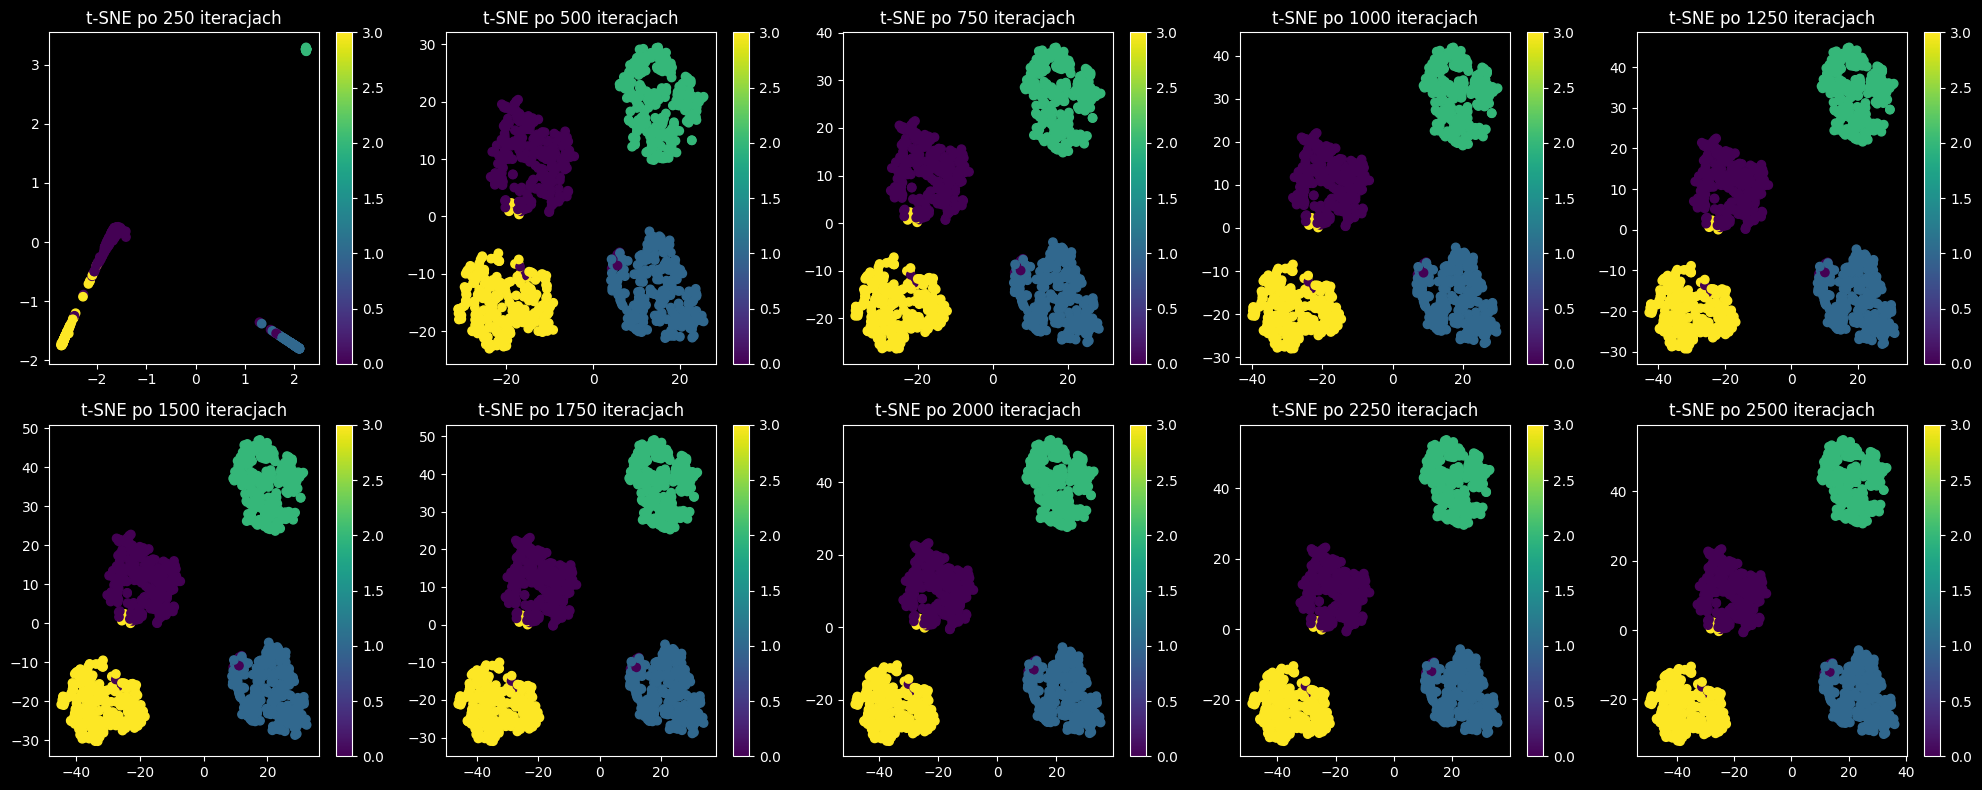

In [64]:
tsne_blobs = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
start_tsne_blobs = time.perf_counter()
X_tsne_blobs = tsne_blobs.fit_transform(X_blobs)
end_tsne_blobs = time.perf_counter()

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i in range(1, 11):
    tsne_temp = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42, n_iter=i * 250)
    X_tsne_blobs = tsne_temp.fit_transform(X_blobs)

    ax = axes[(i-1) // 5, (i-1) % 5]
    scatter = ax.scatter(X_tsne_blobs[:, 0], X_tsne_blobs[:, 1], c=y_blobs, cmap=plt.cm.viridis)
    ax.set_title(f"t-SNE po {i * 250} iteracjach")
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

##### UMAP - Blobs

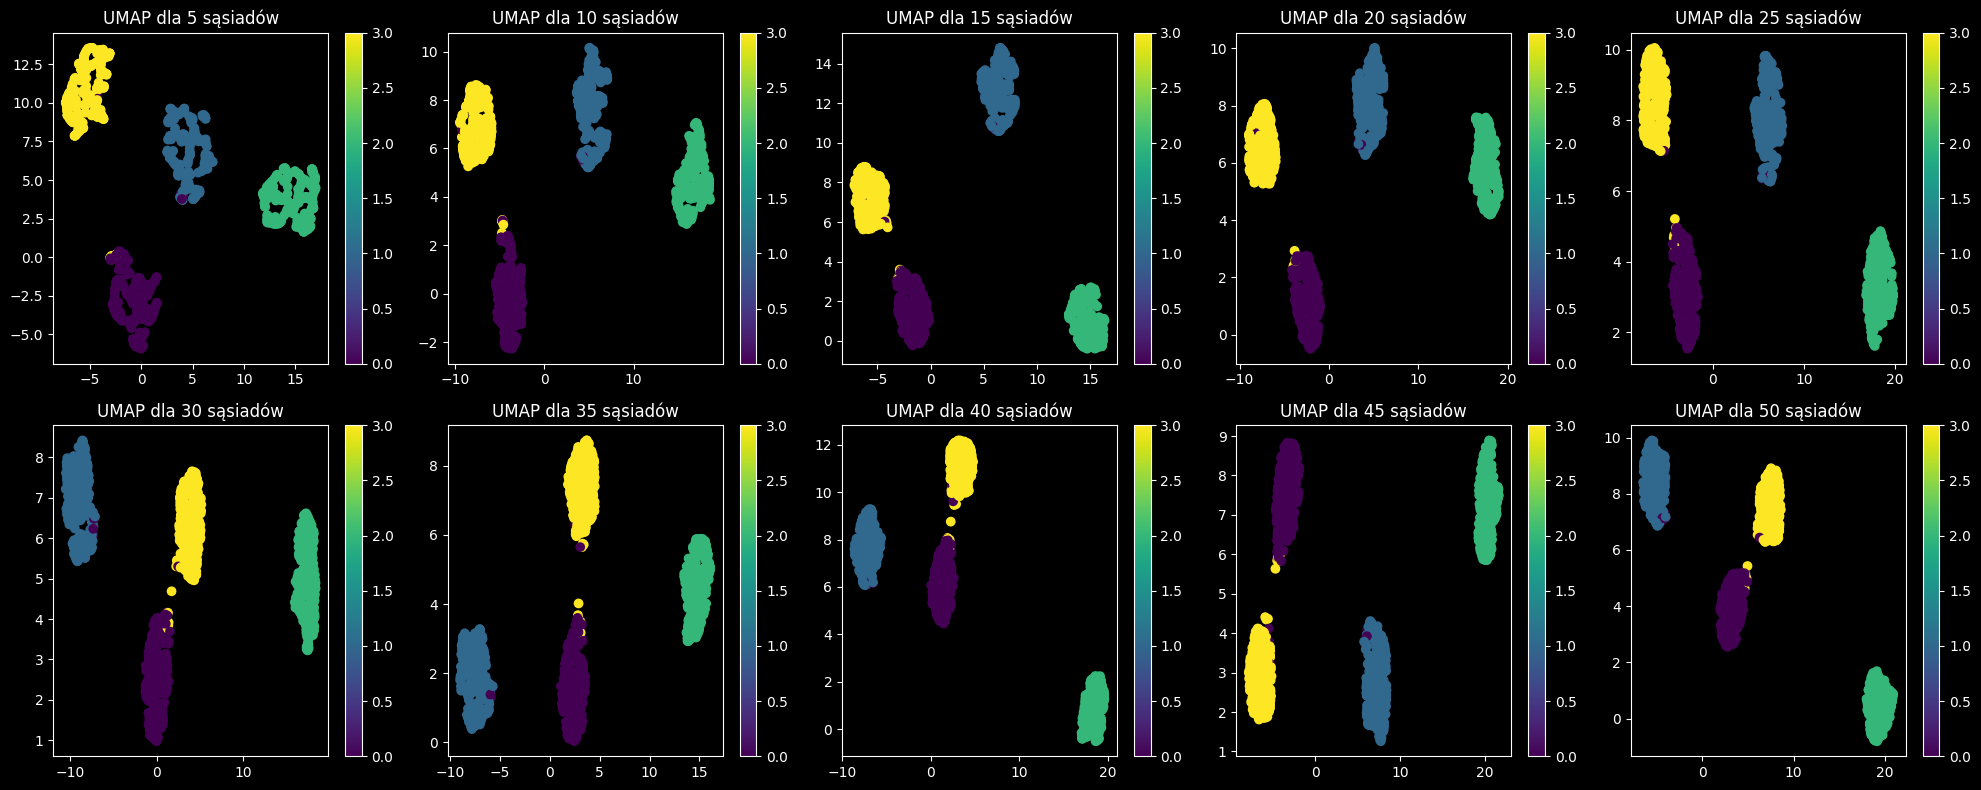

In [65]:
umap_blobs = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
start_umap_blobs = time.perf_counter()
X_umap_blobs = umap_blobs.fit_transform(X_blobs)
end_umap_blobs = time.perf_counter()

fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i in range(1, 11):
    umap_temp = umap.UMAP(n_components=2, n_neighbors=i * 5, min_dist=0.1, random_state=42)
    X_umap_blobs = umap_temp.fit_transform(X_blobs)

    ax = axes[(i-1) // 5, (i-1) % 5] 
    scatter = ax.scatter(X_umap_blobs[:, 0], X_umap_blobs[:, 1], c=y_blobs, cmap=plt.cm.viridis)
    ax.set_title(f"UMAP dla {i*5} sąsiadów")
    fig.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

##### Porównanie czasów redukcji wymiarów zbioru Blobs

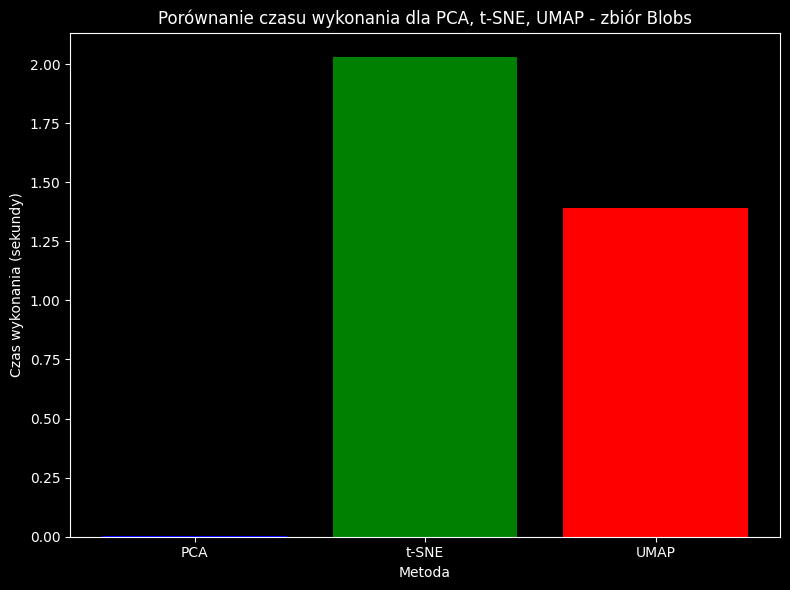

In [67]:
times_blobs = {
    'PCA': end_pca_blobs - start_pca_blobs,
    't-SNE': end_tsne_blobs - start_tsne_blobs,
    'UMAP': end_umap_blobs - start_umap_blobs
}

methods_blobs = list(times_blobs.keys())
execution_times_blobs = list(times_blobs.values())

plt.figure(figsize=(8, 6))
plt.bar(methods_blobs, execution_times_blobs, color=['blue', 'green', 'red'])
plt.xlabel('Metoda')
plt.ylabel('Czas wykonania (sekundy)')
plt.title('Porównanie czasu wykonania dla PCA, t-SNE, UMAP - zbiór Blobs')
plt.tight_layout()
plt.show()

### Zbiór MNIST

##### Wczytanie danych i klasyfikacja za pomocą MLP bez redukcji

In [68]:
mnist = fetch_openml('mnist_784', version=1)
X_mnist, y_mnist = mnist['data'], mnist['target']
y_mnist = y_mnist.astype(int)
X_mnist = X_mnist[:10000]
y_mnist = y_mnist[:10000]

X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

start_nored_predict = time.perf_counter()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
end_nored_predict = time.perf_counter()

print("MNIST - Accuracy bez redukcji:", accuracy_score(y_test, y_pred))
print("MNIST - Precision bez redukcji:", precision_score(y_test, y_pred, average='macro'))
print("MNIST - Recall bez redukcji:", recall_score(y_test, y_pred, average='macro'))
print("MNIST - F1-score bez redukcji:", f1_score(y_test, y_pred, average='macro'))
print("MNIST - Confusion Matrix bez redukcji:\n", confusion_matrix(y_test, y_pred))

MNIST - Accuracy bez redukcji: 0.947
MNIST - Precision bez redukcji: 0.9460948617203282
MNIST - Recall bez redukcji: 0.9455471809857448
MNIST - F1-score bez redukcji: 0.9456791468121699
MNIST - Confusion Matrix bez redukcji:
 [[205   0   0   0   0   0   1   0   1   0]
 [  0 213   1   0   0   0   1   0   1   0]
 [  4   0 189   3   3   0   3   1   0   1]
 [  0   1   2 177   0   4   1   4   1   2]
 [  1   0   0   0 200   1   3   0   1   5]
 [  2   2   3   7   0 158   0   0   4   0]
 [  3   0   3   0   0   2 211   0   1   0]
 [  0   3   3   0   1   0   0 207   0   2]
 [  1   0   1   3   0   1   0   0 157   3]
 [  0   1   1   5   2   1   0   3   2 177]]


##### PCA - redukcja MNIST i klasyfikacja z MLP

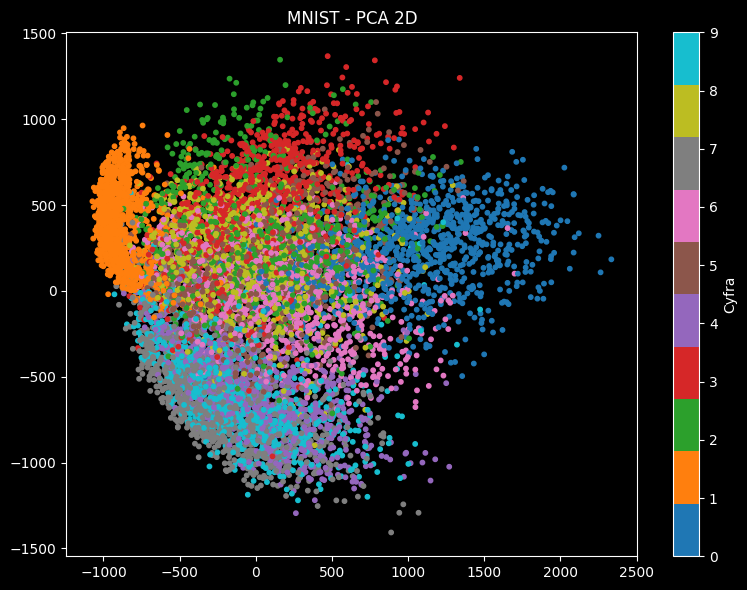

MNIST - Accuracy z PCA: 0.958
MNIST - Precision z PCA: 0.9568948483332438
MNIST - Recall z PCA: 0.9563111023139166
MNIST - F1-score z PCA: 0.9565027241703831
MNIST - Confusion Matrix z PCA:
 [[204   1   0   0   0   1   1   0   0   0]
 [  0 215   1   0   0   0   0   0   0   0]
 [  1   1 194   1   2   1   0   2   1   1]
 [  1   0   4 179   0   0   0   3   4   1]
 [  1   0   0   0 203   0   2   0   2   3]
 [  2   3   0   3   1 162   1   0   3   1]
 [  1   0   0   0   0   4 214   0   1   0]
 [  1   1   0   1   1   0   0 211   0   1]
 [  1   0   4   1   0   2   0   1 156   1]
 [  1   1   0   5   2   1   0   3   1 178]]


In [69]:
pca_mnist = PCA(n_components=50)
X_mnist_pca = pca_mnist.fit_transform(X_mnist)
plt.figure(figsize=(8, 6))
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_mnist, cmap='tab10', s=10)
plt.title("MNIST - PCA 2D")
plt.colorbar(label='Cyfra')
plt.tight_layout()
plt.show()

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_mnist_pca, y_mnist, test_size=0.2, random_state=42)
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

start_pca_predict = time.perf_counter()
clf.fit(X_train_pca_scaled, y_train_pca)
y_pred_pca = clf.predict(X_test_pca_scaled)
end_pca_predict = time.perf_counter()

print("MNIST - Accuracy z PCA:", accuracy_score(y_test_pca, y_pred_pca))
print("MNIST - Precision z PCA:", precision_score(y_test_pca, y_pred_pca, average='macro'))
print("MNIST - Recall z PCA:", recall_score(y_test_pca, y_pred_pca, average='macro'))
print("MNIST - F1-score z PCA:", f1_score(y_test_pca, y_pred_pca, average='macro'))
print("MNIST - Confusion Matrix z PCA:\n", confusion_matrix(y_test_pca, y_pred_pca))

##### t-SNE - redukcja MNIST i klasyfikacja z MLP

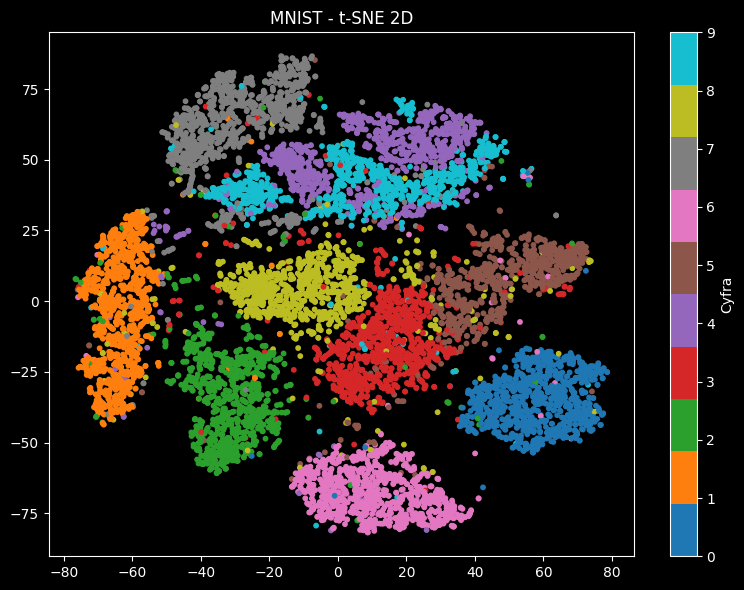

MNIST - Accuracy z t-SNE: 0.8995
MNIST - Precision z t-SNE: 0.9007882294018617
MNIST - Recall z t-SNE: 0.8983291837577324
MNIST - F1-score z t-SNE: 0.8975541268466966
MNIST - Confusion Matrix z t-SNE:
 [[206   1   0   0   0   0   0   0   0   0]
 [  0 213   3   0   0   0   0   0   0   0]
 [  2   4 189   1   0   2   0   2   3   1]
 [  1   0   3 168   0   6   0   2  11   1]
 [  0   5   0   0 149   1   2   6   0  48]
 [  0   2   0   6   0 161   2   0   3   2]
 [  3   0   0   0   0   2 212   0   0   3]
 [  0   6   1   0   2   1   0 193   2  11]
 [  1   2   0   8   0   6   1   1 145   2]
 [  1   1   0   6  16   0   0   5   0 163]]


In [70]:
tsne_mnist = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
X_mnist_tsne = tsne_mnist.fit_transform(X_mnist)
plt.figure(figsize=(8, 6))
plt.scatter(X_mnist_tsne[:, 0], X_mnist_tsne[:, 1], c=y_mnist, cmap='tab10', s=10)
plt.title("MNIST - t-SNE 2D")
plt.colorbar(label='Cyfra')
plt.tight_layout()
plt.show()

X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_mnist_tsne, y_mnist, test_size=0.2, random_state=42)
X_train_tsne_scaled = scaler.fit_transform(X_train_tsne)
X_test_tsne_scaled = scaler.transform(X_test_tsne)

start_tsne_predict = time.perf_counter()
clf.fit(X_train_tsne_scaled, y_train_tsne)
y_pred_tsne = clf.predict(X_test_tsne_scaled)
end_tsne_predict = time.perf_counter()

print("MNIST - Accuracy z t-SNE:", accuracy_score(y_test_tsne, y_pred_tsne))
print("MNIST - Precision z t-SNE:", precision_score(y_test_tsne, y_pred_tsne, average='macro'))
print("MNIST - Recall z t-SNE:", recall_score(y_test_tsne, y_pred_tsne, average='macro'))
print("MNIST - F1-score z t-SNE:", f1_score(y_test_tsne, y_pred_tsne, average='macro'))
print("MNIST - Confusion Matrix z t-SNE:\n", confusion_matrix(y_test_tsne, y_pred_tsne))

##### UMAP - redukcja MNIST i klasyfikacja z MLP

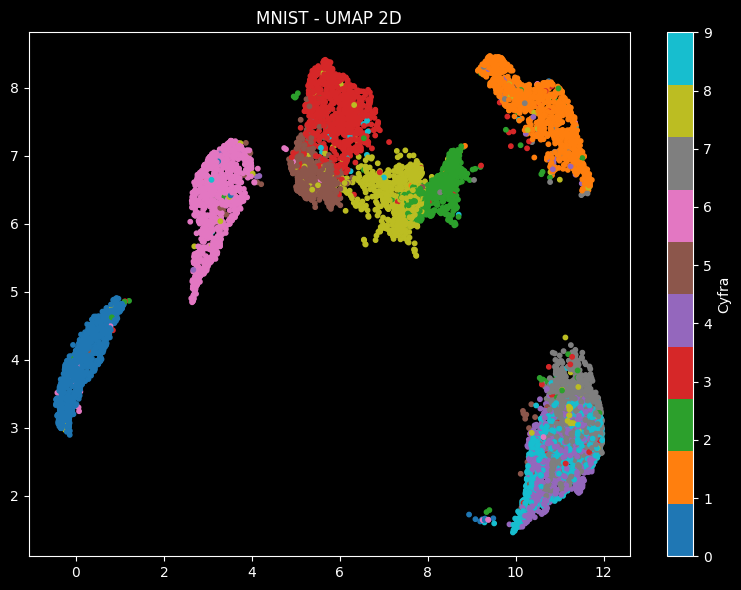

MNIST - Accuracy z UMAP: 0.9465
MNIST - Precision z UMAP: 0.9469874659987931
MNIST - Recall z UMAP: 0.9441454713509616
MNIST - F1-score z UMAP: 0.9450793695398355
MNIST - Confusion Matrix z UMAP:
 [[206   1   0   0   0   0   0   0   0   0]
 [  0 215   1   0   0   0   0   0   0   0]
 [  4   4 190   1   0   0   0   3   1   1]
 [  1   3   2 177   0   3   0   3   2   1]
 [  0   3   0   0 199   0   3   0   0   6]
 [  2   2   0   3   3 162   1   0   1   2]
 [  4   0   0   0   0   2 214   0   0   0]
 [  0   4   1   0   1   0   0 207   0   3]
 [  1   2   0   2   1   6   0   1 148   5]
 [  1   1   0   4   5   1   0   4   1 175]]


In [71]:
umap_mnist = umap.UMAP(n_components=50, n_neighbors=15, min_dist=0.1, random_state=42)
X_mnist_umap = umap_mnist.fit_transform(X_mnist)
plt.figure(figsize=(8, 6))
plt.scatter(X_mnist_umap[:, 0], X_mnist_umap[:, 1], c=y_mnist, cmap='tab10', s=10)
plt.title("MNIST - UMAP 2D")
plt.colorbar(label='Cyfra')
plt.tight_layout()
plt.show()

X_train_umap, X_test_umap, y_train_umap, y_test_umap = train_test_split(X_mnist_umap, y_mnist, test_size=0.2, random_state=42)
X_train_umap_scaled = scaler.fit_transform(X_train_umap)
X_test_umap_scaled = scaler.transform(X_test_umap)

start_umap_predict = time.perf_counter()
clf.fit(X_train_umap_scaled, y_train_umap)
y_pred_umap = clf.predict(X_test_umap_scaled)
end_umap_predict = time.perf_counter()

print("MNIST - Accuracy z UMAP:", accuracy_score(y_test_umap, y_pred_umap))
print("MNIST - Precision z UMAP:", precision_score(y_test_umap, y_pred_umap, average='macro'))
print("MNIST - Recall z UMAP:", recall_score(y_test_umap, y_pred_umap, average='macro'))
print("MNIST - F1-score z UMAP:", f1_score(y_test_umap, y_pred_umap, average='macro'))
print("MNIST - Confusion Matrix z UMAP:\n", confusion_matrix(y_test_umap, y_pred_umap))

##### MNIST - porównanie metryk klasyfikacji dla metod redukcji

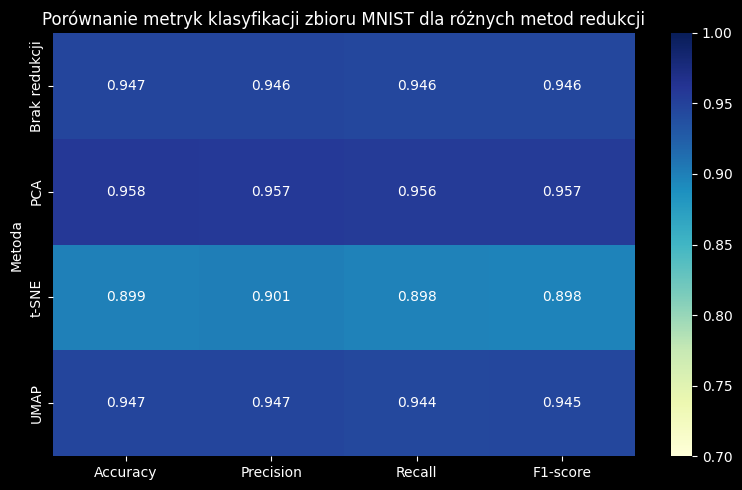

In [72]:
results = {
    'Metoda': ['Brak redukcji', 'PCA', 't-SNE', 'UMAP'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test_pca, y_pred_pca),
        accuracy_score(y_test_tsne, y_pred_tsne),
        accuracy_score(y_test_umap, y_pred_umap)
    ],
    'Precision': [
        precision_score(y_test, y_pred, average='macro'),
        precision_score(y_test_pca, y_pred_pca, average='macro'),
        precision_score(y_test_tsne, y_pred_tsne, average='macro'),
        precision_score(y_test_umap, y_pred_umap, average='macro')
    ],
    'Recall': [
        recall_score(y_test, y_pred, average='macro'),
        recall_score(y_test_pca, y_pred_pca, average='macro'),
        recall_score(y_test_tsne, y_pred_tsne, average='macro'),
        recall_score(y_test_umap, y_pred_umap, average='macro')
    ],
    'F1-score': [
        f1_score(y_test, y_pred, average='macro'),
        f1_score(y_test_pca, y_pred_pca, average='macro'),
        f1_score(y_test_tsne, y_pred_tsne, average='macro'),
        f1_score(y_test_umap, y_pred_umap, average='macro')
    ]
}

df_results = pd.DataFrame(results)
df_results.set_index('Metoda', inplace=True)

plt.figure(figsize=(8, 5))
sns.heatmap(df_results, annot=True, cmap='YlGnBu', fmt=".3f", vmin=0.7, vmax=1)
plt.title("Porównanie metryk klasyfikacji zbioru MNIST dla różnych metod redukcji")
plt.tight_layout()
plt.show()

##### Porównanie czasu predykcji dla metod redukcji

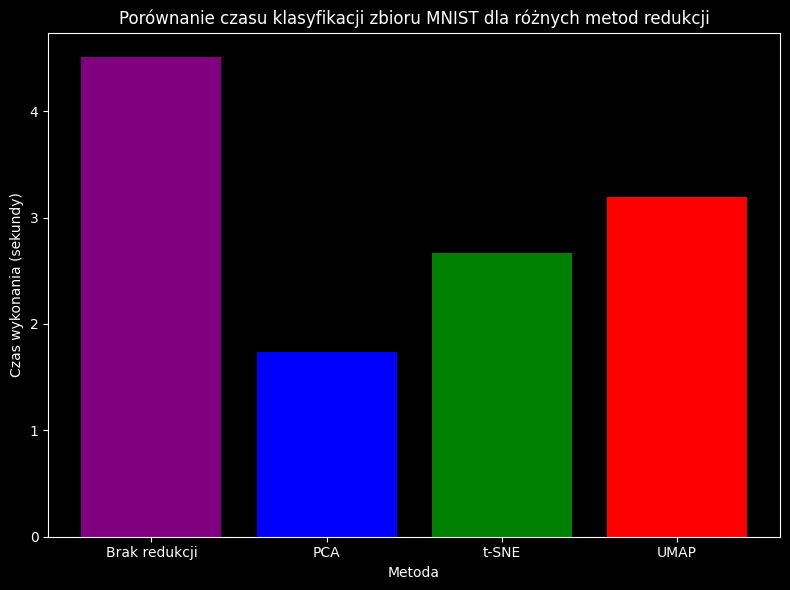

In [73]:
times = {
    'Brak redukcji': end_nored_predict - start_nored_predict,
    'PCA': end_pca_predict - start_pca_predict,
    't-SNE': end_tsne_predict - start_tsne_predict,
    'UMAP': end_umap_predict - start_umap_predict
}

methods = list(times.keys())
execution_times = list(times.values())

plt.figure(figsize=(8, 6))
plt.bar(methods, execution_times, color=['purple', 'blue', 'green', 'red'])
plt.xlabel('Metoda')
plt.ylabel('Czas wykonania (sekundy)')
plt.title('Porównanie czasu klasyfikacji zbioru MNIST dla różnych metod redukcji')
plt.tight_layout()
plt.show()

### Covertype

##### Wczytanie danych i klasyfikacja bez redukcji

In [74]:
data = fetch_covtype()
X_cov, y_cov = data['data'], data['target']
X_cov, y_cov = resample(X_cov, y_cov, n_samples=10000, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_cov, y_cov, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("COVERTYPE - Accuracy bez redukcji:", accuracy_score(y_test, y_pred))
print("COVERTYPE - Precision bez redukcji:", precision_score(y_test, y_pred, average='macro'))
print("COVERTYPE - Recall bez redukcji:", recall_score(y_test, y_pred, average='macro'))
print("COVERTYPE - F1-score bez redukcji:", f1_score(y_test, y_pred, average='macro'))

COVERTYPE - Accuracy bez redukcji: 0.7775
COVERTYPE - Precision bez redukcji: 0.6929365060341804
COVERTYPE - Recall bez redukcji: 0.6108876734703893
COVERTYPE - F1-score bez redukcji: 0.6417456769990103


##### PCA - redukcja Covertype i klasyfikacja z MLP

In [75]:
pca_cov = PCA(n_components=50)
X_cov_pca = pca_cov.fit_transform(X_cov)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_cov_pca, y_cov, test_size=0.2, random_state=42)
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)
clf.fit(X_train_pca_scaled, y_train_pca)
y_pred_pca = clf.predict(X_test_pca_scaled)

print("COVERTYPE - Accuracy z PCA:", accuracy_score(y_test_pca, y_pred_pca))
print("COVERTYPE - Precision z PCA:", precision_score(y_test_pca, y_pred_pca, average='macro'))
print("COVERTYPE - Recall z PCA:", recall_score(y_test_pca, y_pred_pca, average='macro'))
print("COVERTYPE - F1-score z PCA:", f1_score(y_test_pca, y_pred_pca, average='macro'))

COVERTYPE - Accuracy z PCA: 0.7765
COVERTYPE - Precision z PCA: 0.7212297134936435
COVERTYPE - Recall z PCA: 0.614162526983428
COVERTYPE - F1-score z PCA: 0.6520569513720338


##### t-SNE - redukcja Covertype i klasyfikacja MLP

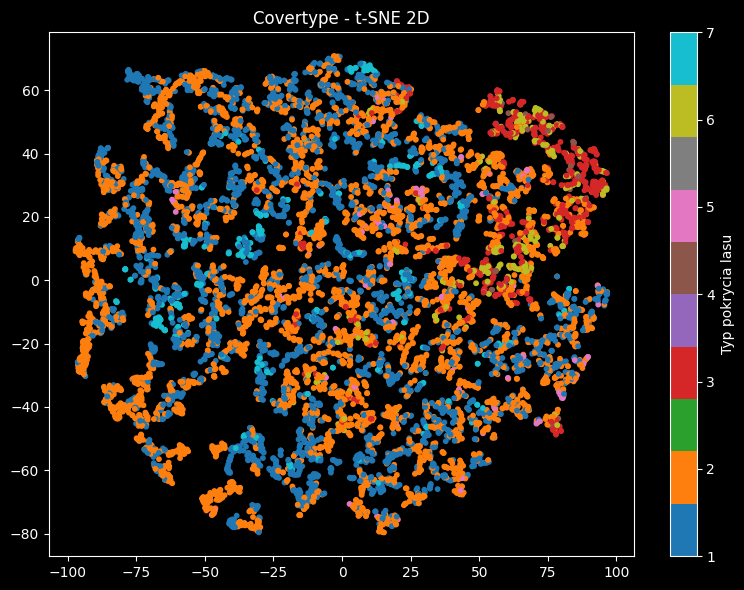

COVERTYPE - Accuracy z t-SNE: 0.5475
COVERTYPE - Precision z t-SNE: 0.24857613880642587
COVERTYPE - Recall z t-SNE: 0.2437534624984226
COVERTYPE - F1-score z t-SNE: 0.23550147101144597


In [76]:
tsne_cov = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
X_cov_tsne = tsne_cov.fit_transform(X_cov)
plt.figure(figsize=(8, 6))
plt.scatter(X_cov_tsne[:, 0], X_cov_tsne[:, 1], c=y_cov, cmap='tab10', s=10)
plt.title("Covertype - t-SNE 2D")
plt.colorbar(label='Typ pokrycia lasu')
plt.tight_layout()
plt.show()

X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_cov_tsne, y_cov, test_size=0.2, random_state=42)
X_train_tsne_scaled = scaler.fit_transform(X_train_tsne)
X_test_tsne_scaled = scaler.transform(X_test_tsne)
clf.fit(X_train_tsne_scaled, y_train_tsne)
y_pred_tsne = clf.predict(X_test_tsne_scaled)

print("COVERTYPE - Accuracy z t-SNE:", accuracy_score(y_test_tsne, y_pred_tsne))
print("COVERTYPE - Precision z t-SNE:", precision_score(y_test_tsne, y_pred_tsne, average='macro'))
print("COVERTYPE - Recall z t-SNE:", recall_score(y_test_tsne, y_pred_tsne, average='macro'))
print("COVERTYPE - F1-score z t-SNE:", f1_score(y_test_tsne, y_pred_tsne, average='macro'))

##### UMAP - redukcja Covertype i klasyfikacja z MLP

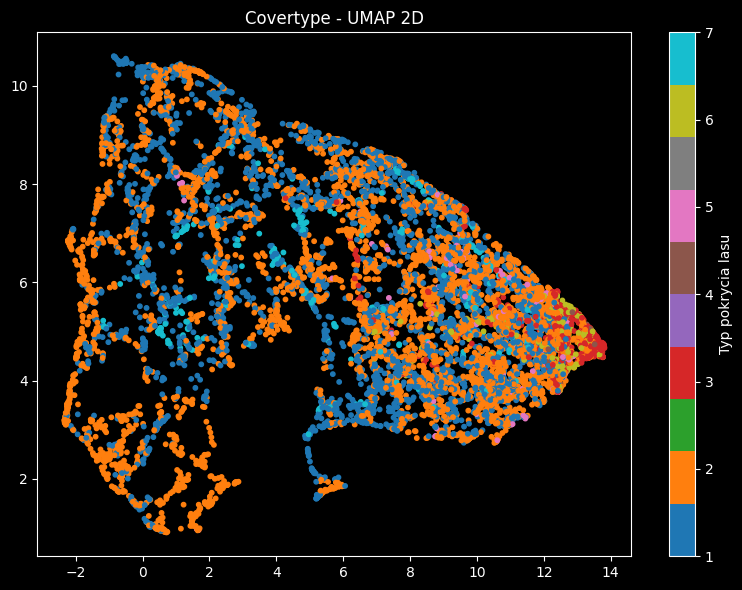

COVERTYPE - Accuracy z UMAP: 0.657
COVERTYPE - Precision z UMAP: 0.46407384071049645
COVERTYPE - Recall z UMAP: 0.33660071713966205
COVERTYPE - F1-score z UMAP: 0.35950270068848716


In [77]:
umap_cov = umap.UMAP(n_components=50, n_neighbors=15, min_dist=0.1, random_state=42)
X_cov_umap = umap_cov.fit_transform(X_cov)
plt.figure(figsize=(8, 6))
plt.scatter(X_cov_umap[:, 0], X_cov_umap[:, 1], c=y_cov, cmap='tab10', s=10)
plt.title("Covertype - UMAP 2D")
plt.colorbar(label='Typ pokrycia lasu')
plt.tight_layout()
plt.show()

X_train_umap, X_test_umap, y_train_umap, y_test_umap = train_test_split(X_cov_umap, y_cov, test_size=0.2, random_state=42)
X_train_umap_scaled = scaler.fit_transform(X_train_umap)
X_test_umap_scaled = scaler.transform(X_test_umap)
clf.fit(X_train_umap_scaled, y_train_umap)
y_pred_umap = clf.predict(X_test_umap_scaled)

print("COVERTYPE - Accuracy z UMAP:", accuracy_score(y_test_umap, y_pred_umap))
print("COVERTYPE - Precision z UMAP:", precision_score(y_test_umap, y_pred_umap, average='macro'))
print("COVERTYPE - Recall z UMAP:", recall_score(y_test_umap, y_pred_umap, average='macro'))
print("COVERTYPE - F1-score z UMAP:", f1_score(y_test_umap, y_pred_umap, average='macro'))

##### Covertype - porównanie metryk klasyfikacji dla metod redukcji

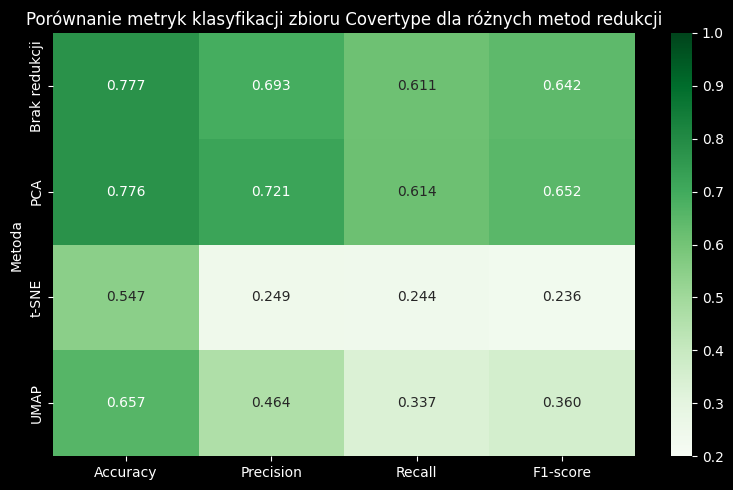

In [78]:
results_cov = {
    'Metoda': ['Brak redukcji', 'PCA', 't-SNE', 'UMAP'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test_pca, y_pred_pca),
        accuracy_score(y_test_tsne, y_pred_tsne),
        accuracy_score(y_test_umap, y_pred_umap)
    ],
    'Precision': [
        precision_score(y_test, y_pred, average='macro'),
        precision_score(y_test_pca, y_pred_pca, average='macro'),
        precision_score(y_test_tsne, y_pred_tsne, average='macro'),
        precision_score(y_test_umap, y_pred_umap, average='macro')
    ],
    'Recall': [
        recall_score(y_test, y_pred, average='macro'),
        recall_score(y_test_pca, y_pred_pca, average='macro'),
        recall_score(y_test_tsne, y_pred_tsne, average='macro'),
        recall_score(y_test_umap, y_pred_umap, average='macro')
    ],
    'F1-score': [
        f1_score(y_test, y_pred, average='macro'),
        f1_score(y_test_pca, y_pred_pca, average='macro'),
        f1_score(y_test_tsne, y_pred_tsne, average='macro'),
        f1_score(y_test_umap, y_pred_umap, average='macro')
    ]
}

df_cov = pd.DataFrame(results_cov)
df_cov.set_index('Metoda', inplace=True)

plt.figure(figsize=(8, 5))
sns.heatmap(df_cov, annot=True, cmap='Greens', fmt=".3f", vmin=0.2, vmax=1)
plt.title("Porównanie metryk klasyfikacji zbioru Covertype dla różnych metod redukcji")
plt.tight_layout()
plt.show()

### Heart Disease

##### Wczytanie danych i klasyfikacja bez redukcji

In [79]:
heart_disease = openml.datasets.get_dataset(22)
X, y, _, _ = heart_disease.get_data(target=heart_disease.default_target_attribute)

y = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print("HEART DISEASE - Accuracy bez redukcji:", accuracy_score(y_test, y_pred))
print("HEART DISEASE - Precision bez redukcji:", precision_score(y_test, y_pred, average='macro'))
print("HEART DISEASE - Recall bez redukcji:", recall_score(y_test, y_pred, average='macro'))
print("HEART DISEASE - F1-score bez redukcji:", f1_score(y_test, y_pred, average='macro'))
print("HEART DISEASE - Confusion Matrix bez redukcji:\n", confusion_matrix(y_test, y_pred))

HEART DISEASE - Accuracy bez redukcji: 0.805
HEART DISEASE - Precision bez redukcji: 0.7910574457980977
HEART DISEASE - Recall bez redukcji: 0.7923176908192144
HEART DISEASE - F1-score bez redukcji: 0.7903667324449906
HEART DISEASE - Confusion Matrix bez redukcji:
 [[32  0  0  0  0  1  0  1  2  0]
 [ 0 45  0  0  2  0  0  0  0  0]
 [ 0  0 45  1  0  0  0  0  0  0]
 [ 0  0  1 33  0  0  0  2  0  0]
 [ 0  1  0  0 33  0  0  0  0  0]
 [ 1  0  0  4  0 27  1  0  0  1]
 [ 0  0  0  1  0  0  8  0  1 23]
 [ 0  0  0  1  0  0  1 42  0  0]
 [ 1  0  0  0  0  0  0  0 46  1]
 [ 0  1  0  1  1  1 26  0  1 11]]


##### PCA - redukcja Heart Disease i klasyfikacja z MLP

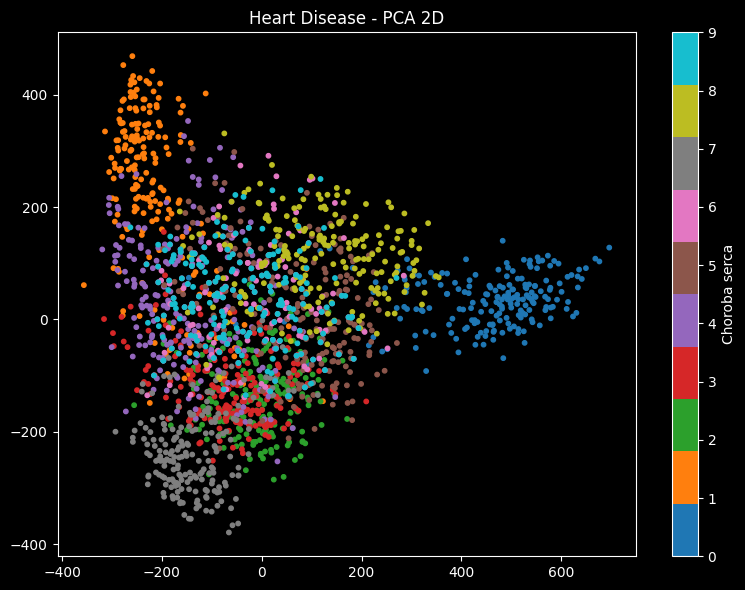

HEART DISEASE - Accuracy z PCA: 0.57
HEART DISEASE - Precision z PCA: 0.5581279397050644
HEART DISEASE - Recall z PCA: 0.5521896027494057
HEART DISEASE - F1-score z PCA: 0.550063657730714
HEART DISEASE - Confusion Matrix z PCA:
 [[32  0  0  0  0  2  0  0  2  0]
 [ 0 39  1  1  3  0  0  0  0  3]
 [ 0  0 24 12  0  2  1  3  0  4]
 [ 0  1  7 21  4  1  0  1  0  1]
 [ 0  1  4  6 15  2  3  0  0  3]
 [ 0  0  7  1  2 11  3  1  7  2]
 [ 0  0  0  3  8  7  4  0  2  9]
 [ 0  0  1  6  0  0  0 36  0  1]
 [ 2  0  0  1  2  3  0  0 34  6]
 [ 0  0  1  2 12  5  6  0  4 12]]


In [80]:
pca_heart = PCA(n_components=2)
X_heart_pca = pca_heart.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_heart_pca[:, 0], X_heart_pca[:, 1], c=y, cmap='tab10', s=10)
plt.title("Heart Disease - PCA 2D")
plt.colorbar(label='Choroba serca')
plt.tight_layout()
plt.show()

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_heart_pca, y, test_size=0.2, random_state=42)
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

clf.fit(X_train_pca_scaled, y_train_pca)
y_pred_pca = clf.predict(X_test_pca_scaled)
print("HEART DISEASE - Accuracy z PCA:", accuracy_score(y_test_pca, y_pred_pca))
print("HEART DISEASE - Precision z PCA:", precision_score(y_test_pca, y_pred_pca, average='macro'))
print("HEART DISEASE - Recall z PCA:", recall_score(y_test_pca, y_pred_pca, average='macro'))
print("HEART DISEASE - F1-score z PCA:", f1_score(y_test_pca, y_pred_pca, average='macro'))
print("HEART DISEASE - Confusion Matrix z PCA:\n", confusion_matrix(y_test_pca, y_pred_pca))

##### t-SNE - redukcja Heart Disease i klasyfikacja z MLP

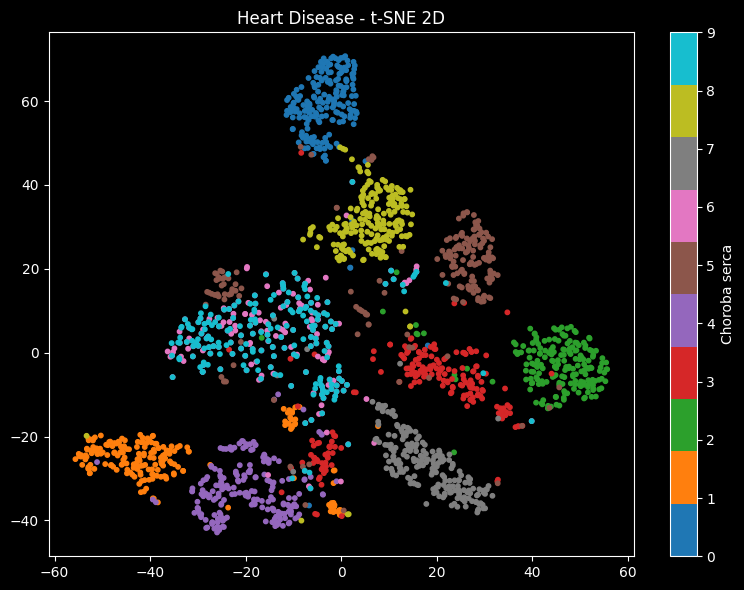

HEART DISEASE - Accuracy z t-SNE: 0.835
HEART DISEASE - Precision z t-SNE: 0.8158053365769261
HEART DISEASE - Recall z t-SNE: 0.8234238647523595
HEART DISEASE - F1-score z t-SNE: 0.8184693968498647
HEART DISEASE - Confusion Matrix z t-SNE:
 [[34  0  0  1  0  0  0  0  1  0]
 [ 0 43  0  0  2  0  2  0  0  0]
 [ 0  0 45  1  0  0  0  0  0  0]
 [ 1  1  0 32  0  0  0  1  0  1]
 [ 0  2  0  2 29  0  1  0  0  0]
 [ 1  0  0  2  1 30  0  0  0  0]
 [ 0  0  0  2  2  2 12  0  1 14]
 [ 0  0  0  0  0  0  1 43  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  2  1  3 16  0  1 19]]


In [81]:
tsne_heart = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, random_state=42)
X_heart_tsne = tsne_heart.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_heart_tsne[:, 0], X_heart_tsne[:, 1], c=y, cmap='tab10', s=10)
plt.title("Heart Disease - t-SNE 2D")
plt.colorbar(label='Choroba serca')
plt.tight_layout()
plt.show()

X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_heart_tsne, y, test_size=0.2, random_state=42)
X_train_tsne_scaled = scaler.fit_transform(X_train_tsne)
X_test_tsne_scaled = scaler.transform(X_test_tsne)

clf.fit(X_train_tsne_scaled, y_train_tsne)
y_pred_tsne = clf.predict(X_test_tsne_scaled)
print("HEART DISEASE - Accuracy z t-SNE:", accuracy_score(y_test_tsne, y_pred_tsne))
print("HEART DISEASE - Precision z t-SNE:", precision_score(y_test_tsne, y_pred_tsne, average='macro'))
print("HEART DISEASE - Recall z t-SNE:", recall_score(y_test_tsne, y_pred_tsne, average='macro'))
print("HEART DISEASE - F1-score z t-SNE:", f1_score(y_test_tsne, y_pred_tsne, average='macro'))
print("HEART DISEASE - Confusion Matrix z t-SNE:\n", confusion_matrix(y_test_tsne, y_pred_tsne))

##### UMAP - redukcja Heart Disease i klasyfikacja MLP

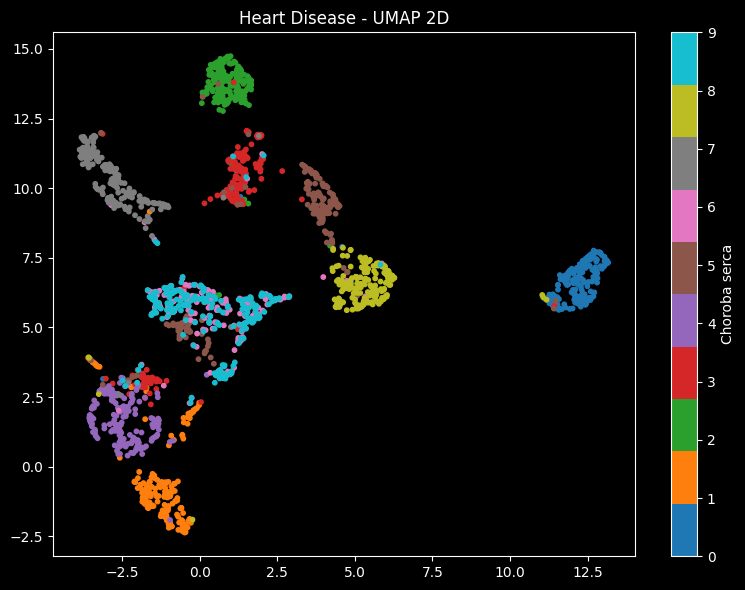

HEART DISEASE - Accuracy z UMAP: 0.845
HEART DISEASE - Precision z UMAP: 0.8284302502872635
HEART DISEASE - Recall z UMAP: 0.8369268884634561
HEART DISEASE - F1-score z UMAP: 0.8303593475913669
HEART DISEASE - Confusion Matrix z UMAP:
 [[34  0  0  1  0  1  0  0  0  0]
 [ 0 46  0  0  1  0  0  0  0  0]
 [ 0  0 45  1  0  0  0  0  0  0]
 [ 1  1  0 31  1  0  1  1  0  0]
 [ 0  1  0  0 33  0  0  0  0  0]
 [ 1  0  0  3  0 30  0  0  0  0]
 [ 0  0  0  1  2  0 16  0  0 14]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  1  0  0  0  1  0  0 46  0]
 [ 0  0  0  3  1  1 22  1  0 14]]


In [82]:
umap_heart = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_heart_umap = umap_heart.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_heart_umap[:, 0], X_heart_umap[:, 1], c=y, cmap='tab10', s=10)
plt.title("Heart Disease - UMAP 2D")
plt.colorbar(label='Choroba serca')
plt.tight_layout()
plt.show()

X_train_umap, X_test_umap, y_train_umap, y_test_umap = train_test_split(X_heart_umap, y, test_size=0.2, random_state=42)
X_train_umap_scaled = scaler.fit_transform(X_train_umap)
X_test_umap_scaled = scaler.transform(X_test_umap)

clf.fit(X_train_umap_scaled, y_train_umap)
y_pred_umap = clf.predict(X_test_umap_scaled)
print("HEART DISEASE - Accuracy z UMAP:", accuracy_score(y_test_umap, y_pred_umap))
print("HEART DISEASE - Precision z UMAP:", precision_score(y_test_umap, y_pred_umap, average='macro'))
print("HEART DISEASE - Recall z UMAP:", recall_score(y_test_umap, y_pred_umap, average='macro'))
print("HEART DISEASE - F1-score z UMAP:", f1_score(y_test_umap, y_pred_umap, average='macro'))
print("HEART DISEASE - Confusion Matrix z UMAP:\n", confusion_matrix(y_test_umap, y_pred_umap))

##### Heart Disease - porównanie metryk klasyfikacji dla metod redukcji

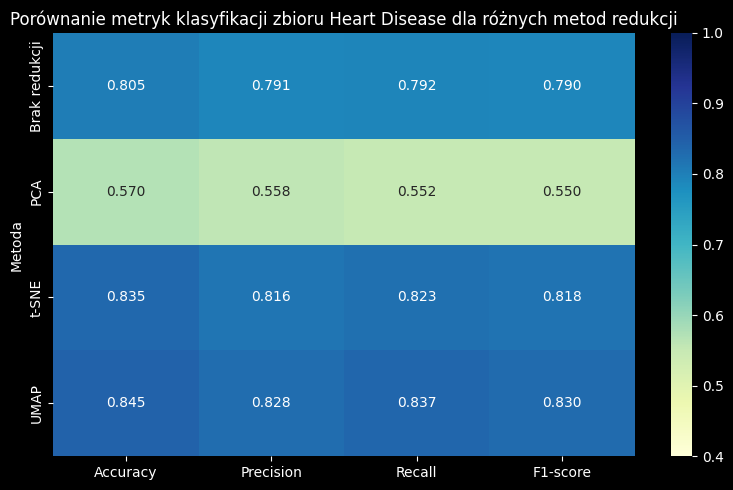

In [83]:
results = {
    'Metoda': ['Brak redukcji', 'PCA', 't-SNE', 'UMAP'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test_pca, y_pred_pca),
        accuracy_score(y_test_tsne, y_pred_tsne),
        accuracy_score(y_test_umap, y_pred_umap)
    ],
    'Precision': [
        precision_score(y_test, y_pred, average='macro'),
        precision_score(y_test_pca, y_pred_pca, average='macro'),
        precision_score(y_test_tsne, y_pred_tsne, average='macro'),
        precision_score(y_test_umap, y_pred_umap, average='macro')
    ],
    'Recall': [
        recall_score(y_test, y_pred, average='macro'),
        recall_score(y_test_pca, y_pred_pca, average='macro'),
        recall_score(y_test_tsne, y_pred_tsne, average='macro'),
        recall_score(y_test_umap, y_pred_umap, average='macro')
    ],
    'F1-score': [
        f1_score(y_test, y_pred, average='macro'),
        f1_score(y_test_pca, y_pred_pca, average='macro'),
        f1_score(y_test_tsne, y_pred_tsne, average='macro'),
        f1_score(y_test_umap, y_pred_umap, average='macro')
    ]
}

df_results = pd.DataFrame(results)
df_results.set_index('Metoda', inplace=True)

plt.figure(figsize=(8, 5))
sns.heatmap(df_results, annot=True, cmap='YlGnBu', fmt=".3f", vmin=0.4, vmax=1)
plt.title("Porównanie metryk klasyfikacji zbioru Heart Disease dla różnych metod redukcji")
plt.tight_layout()
plt.show()